In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from generation.utils import set_seed

set_seed()

Set seed 42


In [2]:
# !pip install -e ../..

### Config

In [2]:
config = {
    "lr": 1e-5,
    "epochs_num": 3000,
    "batch_size": 64,
    "log_each": 1,
    "save_each": 2,
    "device": "cuda:2",
    "x_dim": 1024,
    "z_dim": 8,
    "disc_coef": 5,
    "lambda": 5
}

### Data

In [8]:
from generation.dataset.shapes_dataset import ShapesDataset
            
dataset = ShapesDataset(4, signal_size=config['x_dim'])

/datadrive/pafakanov/hse/hep_generative_models/generation/dataset/shapes_dataset.py:54: RuntimeWarning: invalid value encountered in true_divide
  data = (data - min_values[:, None]) / (max_values - min_values)[:, None]


Signal size: (1024,)


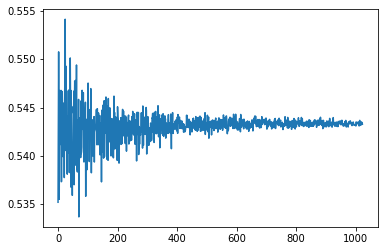

In [11]:
idx = np.random.choice(range(len(dataset)))
signal = dataset[idx].numpy()
print("Signal size:", signal.shape)
plt.plot(signal)
plt.show()

### Models

In [6]:
from generation.nets.shapes import Generator, Discriminator

In [7]:
discriminator = Discriminator(config)
test_tensor = dataset[0].unsqueeze(0)
discriminator(test_tensor, debug=True)
generator = Generator(config)
test_z = torch.rand(1, config['z_dim'])
output = generator(test_z, debug=True)
assert(output.shape == test_tensor.shape)

torch.Size([1, 1, 1024])
torch.Size([1, 8, 1024])
torch.Size([1, 8, 340])
torch.Size([1, 32, 340])
torch.Size([1, 32, 112])
torch.Size([1, 8, 112])
torch.Size([1, 8, 36])
torch.Size([1, 288])
torch.Size([1, 1])
torch.Size([1, 1024])
torch.Size([1, 1, 1024])
torch.Size([1, 8, 1024])
torch.Size([1, 32, 1024])
torch.Size([1, 16, 1024])
torch.Size([1, 8, 1024])
torch.Size([1, 1, 1024])


### Training

In [8]:
from generation.training.wgan_trainer import WganTrainer

g_optimizer = torch.optim.Adam(generator.parameters(), lr=config['lr'])
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=config['lr'])

trainer = WganTrainer(generator, discriminator, g_optimizer, \
                      d_optimizer, config)

In [ ]:
trainer.run_train(dataset)